# Atividade #

## Começo

#### Contexto

Resumo : Estão incluídos um conjunto de dados, relacionado com amostras de vinho tinto, do norte de Portugal. O objetivo é modelar a qualidade do vinho com base em testes físico-químicos.

### Variaveis

##### Ordem/ Nome Traduzido/ Nome no Dataset

1.    acidez fixa (fixed acidity)
2.    acidez volátil (volatile acidity)
3.    ácido cítrico (citric acid)
4.    açúcar residual (residual sugar)
5.    cloretos (chlorides)
6.    dióxido de enxofre livre (free sulfur dioxide)
7.    dióxido de enxofre total (total sulfur dioxide)
8.    densidade (density)
9.    pH (pH)
10.   sulfatos (sulphates)
11.   álcool (alcohol)
      Variável de saída (baseada em dados sensoriais):
12.   qualidade (pontuação entre 0 e 8) (quality)

### Importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Importando Dataset

In [3]:
dataset = pd.read_csv('data/winequality-red.csv')

### Vendo o número de linhas e colunas

In [36]:
dataset.shape

(1599, 13)

### Verificando quantidade de valores ausentes

In [37]:
print (dataset.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
class_qualidade         0
dtype: int64


### Vendo as correlações entre as variaveis

Fazendo pesquisas sobre alguns tipos de graficos para analise achei bem interessante esse, porque da pra ver bem as correlações, se percebe que o alcool (alcohol), acido citrico (citric acid) e os sulfatos (sulphates) tem uma correlação maior sobre a qualidade que os outros.

E a Acidez Fixa (fixed acidity) é a que tem uma correlaçao mais forte com as outras variaveis sendo de 0,67 com Acido Citrico (citric acid) e tambem com a densidade (density)

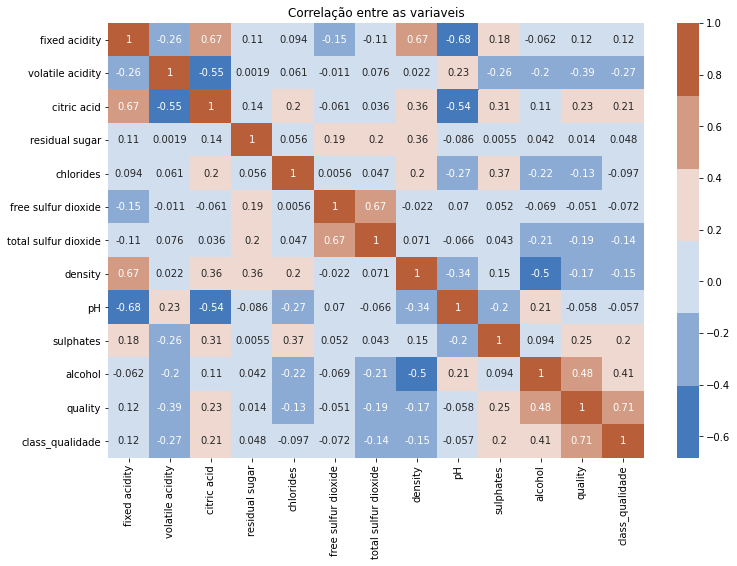

In [14]:
%matplotlib inline
correlacao= dataset.corr () 
plt.subplots (figsize = (12,8)) 
plt.title('Correlação entre as variaveis')
sns.heatmap (correlacao, xticklabels = correlacao.columns, yticklabels = correlacao.columns, annot=True,
             cmap = sns.diverging_palette (250 , 25))

## Começando o objetivo do projeto

### Criando uma classificação para a qualidade do Vinho. 

Qualidade varia entre 0 a 8.

1. Qualidade 7 ou 8 = Vinho bom (Variavel = 2)
2. Qualidade 5 ou 6 = Vinho normal (Variavel = 1)
3. Qualidade menor que 5 = Vinho ruim (Variavel = 0)


In [4]:
dataset['class_qualidade'] = [2 if x >= 7 else 1 if x >= 5 else 0 for x in dataset['quality']]

### Declarando as variaveis

In [5]:
X = dataset.drop (['quality', 'class_qualidade'], axis = 1).to_numpy() 
y = dataset ['class_qualidade'].to_numpy()

### Vendo agora a contagem de qualidade de vinhos

In [6]:
dataset ['class_qualidade'].value_counts()

1    1319
2     217
0      63
Name: class_qualidade, dtype: int64

### Vendo agora a proporção em grafico

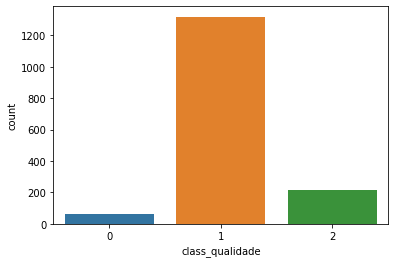

In [7]:
sns.countplot (dataset['class_qualidade']) 

### Usando train e test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

### Exibindo os tamanhos dos trains e tests

In [7]:
print('Tamanho de X_train: ',X_train.shape)
print('Tamanho de X_test: ',X_test.shape)
print('Tamanho de y_train: ',y_train.shape)
print('Tamanho de y_test: ',y_train.shape)

Tamanho de X_train:  (1199, 11)
Tamanho de X_test:  (400, 11)
Tamanho de y_train:  (1199,)
Tamanho de y_test:  (1199,)


### Usando arvore de decisão

Iremos usar esse metodo, porque é um metodo que gostamos, é interessante como resolve as coisas com fluxogramas, ficou bem facil o entendimento por já termos estudado fluxogramas. Basico mas que consegue lidas com varios problemas

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2,
                             min_samples_split=20,
                             random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=20, random_state=123)

### Vendo a acuracia

In [9]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.85

 ---------------------------

Acurácia de Teste: 0.84


### Imprimindo em tela a arvore

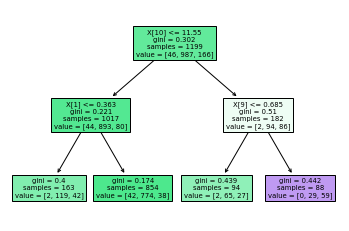

In [23]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, filled=True)
plt.show()

### Usando Floresta aleatoria

Por ser tratar tambem de arvores, resolvemos testar esse metodo tambem

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=4,
                             random_state=123,
                             n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=1000, n_jobs=-1,
                       random_state=123)

### Vendo a acuracia

In [22]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.87

 ---------------------------

Acurácia de Teste: 0.85


### Imprimindo em tela a arvore

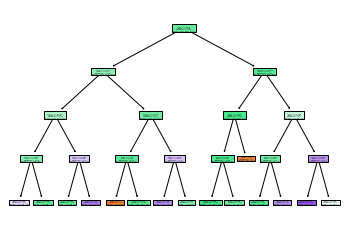

In [35]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf.estimators_[0], filled=True)

plt.show()